In [31]:
# checks if the montecarlo simulation generates the same distribution as a manufactured event log for a simple Petri net

import pm4py
from pm4py import write_xes as xes
from pm4py.objects.log.obj import EventLog, Trace
from datetime import datetime, timedelta
import numpy as np
import pm4py.algo.simulation.montecarlo as monte
from pm4py.algo.simulation.montecarlo import algorithm as montecarlo_simulation
from pm4py.algo.conformance.tokenreplay.algorithm import Variants
import pandas as pd
import random

random.seed(2023)
np.random.seed(2023)

In [32]:
# Function to generate timestamps based on an exponential distribution
def generate_timestamps(num_events, num_traces, lambda_value):
    total_timestamps = num_events*num_traces
    timestamps = [timedelta(seconds=np.random.exponential(1/lambda_value)) for _ in range(total_timestamps)]
    return timestamps

# Generate event names and timestamps based on the exponential distribution
num_events = 3
num_traces = 50

lambda_value = 0.1 
events = ['Begin', 'Middle', 'End']
timestamps = generate_timestamps(num_events, num_traces, lambda_value)
# Create a synthetic event log

log = EventLog()
trace = Trace()
a=0
current_time = datetime(2023, 1, 1)
for j in range(num_traces):
    trace = Trace()

    for i in range(num_events):
        current_time += timestamps[a]

        name = events[i]

        event = {
            'concept:name': name,
            'time:timestamp': pd.Timestamp(current_time),
            'Activity': name
        }
        trace.insert(i, event)
        a=a+1
    log.append(trace)





pm4py.write_xes(log, "/Users/ethanjohnson/Desktop/mphil-project/processed_data/disttest_simple.xes")
for trace in log:
    for event in trace:
        print(event)



/Users/ethanjohnson/.local/share/virtualenvs/mphil-project-KaAb4vnI/lib/python3.10/site-packages/pm4py/utils.py:537: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")
exporting log, completed traces :: 100%|██████████| 50/50 [00:00<00:00, 19934.90it/s]

{'concept:name': 'Begin', 'time:timestamp': Timestamp('2023-01-01 00:00:03.885907'), 'Activity': 'Begin'}
{'concept:name': 'Middle', 'time:timestamp': Timestamp('2023-01-01 00:00:25.997135'), 'Activity': 'Middle'}
{'concept:name': 'End', 'time:timestamp': Timestamp('2023-01-01 00:00:34.865723'), 'Activity': 'End'}
{'concept:name': 'Begin', 'time:timestamp': Timestamp('2023-01-01 00:00:36.219295'), 'Activity': 'Begin'}
{'concept:name': 'Middle', 'time:timestamp': Timestamp('2023-01-01 00:00:37.743132'), 'Activity': 'Middle'}
{'concept:name': 'End', 'time:timestamp': Timestamp('2023-01-01 00:00:44.052288'), 'Activity': 'End'}
{'concept:name': 'Begin', 'time:timestamp': Timestamp('2023-01-01 00:00:44.275661'), 'Activity': 'Begin'}
{'concept:name': 'Middle', 'time:timestamp': Timestamp('2023-01-01 00:00:57.268564'), 'Activity': 'Middle'}
{'concept:name': 'End', 'time:timestamp': Timestamp('2023-01-01 00:01:04.700079'), 'Activity': 'End'}
{'concept:name': 'Begin', 'time:timestamp': Timestam

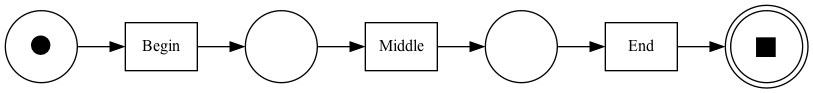

In [33]:
from pm4py.visualization.petri_net import visualizer as pn_visualizer
net, im, fm = pm4py.discover_petri_net_inductive(log)

gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.view(gviz)

In [34]:
parameters={}
parameters[montecarlo_simulation.Variants.PETRI_SEMAPH_FIFO.value.Parameters.PARAM_MAX_THREAD_EXECUTION_TIME] = 1000

parameters[montecarlo_simulation.Variants.PETRI_SEMAPH_FIFO.value.Parameters.PARAM_NUM_SIMULATIONS] = num_traces

simulated_log, res = montecarlo_simulation.apply(log, net, im, fm, parameters=parameters)

pm4py.write_xes(simulated_log, "/Users/ethanjohnson/Desktop/mphil-project/processed_data/simdisttest_simple.xes")

INFO:pm4py.algo.simulation.montecarlo.variants.petri_semaph_fifo:1701697391.6867719 started the replay operation.
/Users/ethanjohnson/.local/share/virtualenvs/mphil-project-KaAb4vnI/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:1983: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
INFO:pm4py.algo.simulation.montecarlo.variants.petri_semaph_fifo:1701697391.7084749 ended the replay operation.
INFO:pm4py.algo.simulation.montecarlo.variants.petri_semaph_fifo:1701697391.711346 terminated successfully thread ID 0
INFO:pm4py.algo.simulation.montecarlo.variants.petri_semaph_fifo:1701697391.712299 terminated successfully thread ID 2
INFO:pm4py.algo.simulation.montecarlo.variants.petri_semaph_fifo:1701697391.712859 terminated successfully thread ID 1
INFO:pm4py.algo.simulation.montecarlo.variants.petri_semaph_fifo:1701697391.713045 terminated successfully thread ID 3
INFO:pm4py.algo.simulation.montecarlo.variants.petri_semaph_

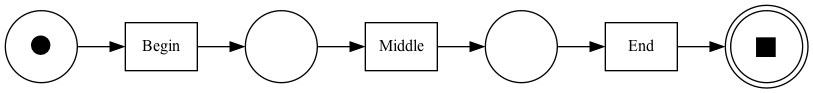

In [35]:
simnet, simim, simfm = pm4py.discover_petri_net_inductive(simulated_log)

gviz = pn_visualizer.apply(simnet, simim, simfm)
pn_visualizer.view(gviz)

Summary Statistics for Generated Log Time Differences:
count    149.000000
mean       9.357204
std        9.192556
min        0.132936
25%        3.031270
50%        6.608856
75%       12.864304
max       52.294385
dtype: float64

Summary Statistics for Simulated Log Time Differences:
count    149.000000
mean       9.344590
std        7.652609
min        0.180893
25%        2.500842
50%        7.415948
75%       14.838149
max       28.288540
dtype: float64


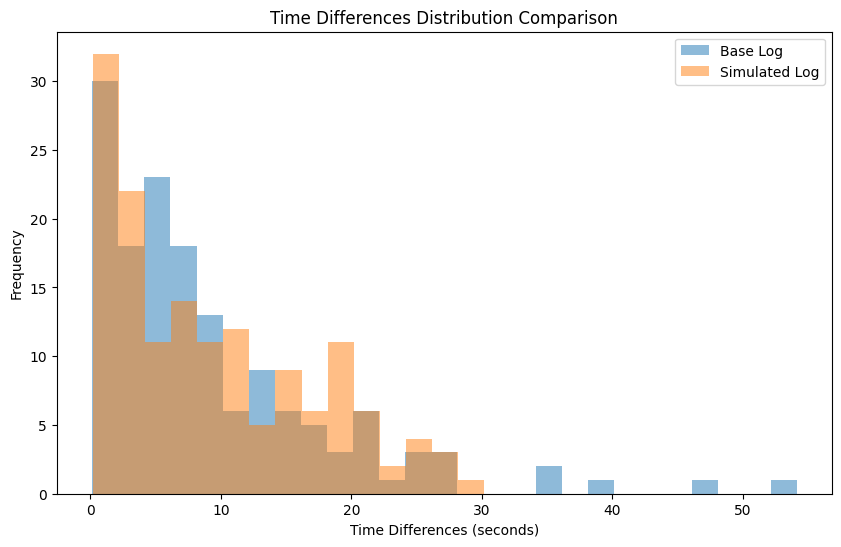

Kolmogorov-Smirnov Test p-value: 0.5278271160277651


In [36]:
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt

# Load event logs
log1 = log  # Replace 'log1.xes' with your file
log2 = simulated_log  # Replace 'log2.xes' with your file

# Extract timestamps from event logs
timestamps_log1 = [event['time:timestamp'] for trace in log1 for event in trace]
timestamps_log2 = [event['time:timestamp'] for trace in log2 for event in trace]

timestamps_log1.sort()
timestamps_log2.sort()

# Compute time differences
time_diff_log1 = [(timestamps_log1[i + 1] - timestamps_log1[i]).total_seconds()
                  for i in range(len(timestamps_log1) - 1)]
time_diff_log2 = [(timestamps_log2[i + 1] - timestamps_log2[i]).total_seconds()
                  for i in range(len(timestamps_log2) - 1)]



# Summary statistics
print("Summary Statistics for Generated Log Time Differences:")
print(pd.Series(time_diff_log1).describe())

print("\nSummary Statistics for Simulated Log Time Differences:")
print(pd.Series(time_diff_log2).describe())

w = 2
# Visualization - Histograms
plt.figure(figsize=(10, 6))
plt.hist(time_diff_log1, bins=np.arange(min(time_diff_log1), max(time_diff_log1) + w, w), alpha=0.5, label='Base Log')
plt.hist(time_diff_log2, bins=np.arange(min(time_diff_log2), max(time_diff_log2) + w, w), alpha=0.5, label='Simulated Log')
plt.legend()
plt.title('Time Differences Distribution Comparison')
plt.xlabel('Time Differences (seconds)')
plt.ylabel('Frequency')
plt.show()

# Statistical Test (Kolmogorov-Smirnov Test)
ks_stat, p_value = ks_2samp(time_diff_log1, time_diff_log2)
print(f"Kolmogorov-Smirnov Test p-value: {p_value}")